In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.svm import SVR
from matplotlib.colors import ListedColormap



In [2]:
test=pd.read_csv("Testing.csv") 
train=pd.read_csv("Training.csv")

In [3]:
train.sample(n=1)
#This will indicate any random 1 data will be retreived 



,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
3038,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [4]:
data = pd.concat([train, test])


In [5]:
data.sample(10)
#This will give us randome sample data 


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
1959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypothyroidism
2848,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,hepatitis A
4253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Varicose veins
2956,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
15,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria
2726,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis B
1354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cervical spondylosis
3853,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
1038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis C
444,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis


In [6]:
data.head(5)
# This will retrieve the 1st 5 data 


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [7]:
data.tail(5)
# This will retrive the last 5 data 

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
37,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
39,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
40,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [8]:
data.columns
# This will retrieve all the colums associated with the dataset 

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [9]:
data.shape
# It has 4961 rows and 133 columns 

(4961, 133)

In [10]:
data.info()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

<AxesSubplot:title={'center':'skin_rash'}, xlabel='itching'>

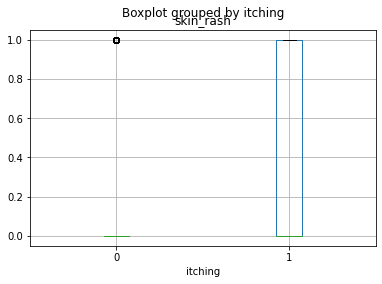

In [ ]:
# What we are expecting from visualization. ? 
data.boxplot(column ='skin_rash', by='itching') #boxplot shows outlier, median,Q3,Q1


<AxesSubplot:>

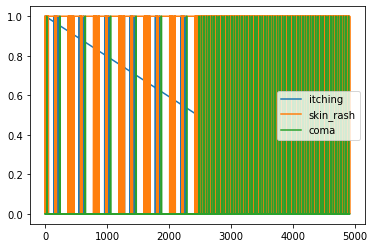

In [ ]:

# # What we are expecting from visualization. ? 

data1 =data.loc[:,["itching","skin_rash","coma"] ]
data1.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

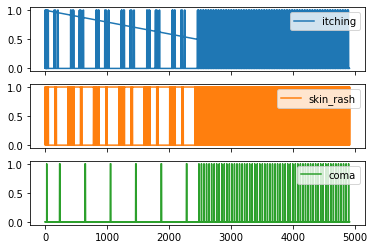

In [ ]:
## What we are expecting from visualization. ? 

data1.plot(subplots =True)


<AxesSubplot:xlabel='depression', ylabel='muscle_pain'>

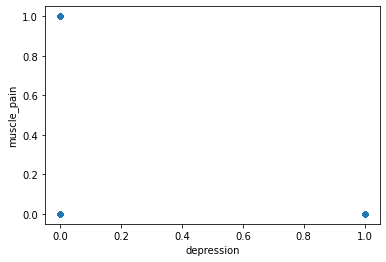

In [ ]:
data.plot(kind= "scatter",x="depression", y="muscle_pain")


<AxesSubplot:ylabel='Frequency'>

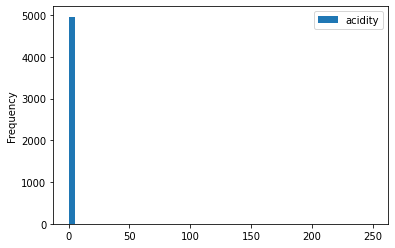

In [ ]:
data.plot(kind="hist", y="acidity", bins = 50, range=(0,250))


In [ ]:
data.isnull().sum()


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
#Importing the train_test_split functionality 
from sklearn.model_selection import train_test_split

X, y=data.iloc[:,:-1], data.iloc[:,-1]

#Spliting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
#70% training and 30% test 

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=list(data.columns[:-1])).sort_values(ascending=False).head(50)
feature_imp[::-1]

increased_appetite                0.008410
burning_micturition               0.008418
extra_marital_contacts            0.008467
depression                        0.008549
internal_itching                  0.008578
movement_stiffness                0.008664
knee_pain                         0.008675
stomach_bleeding                  0.008678
spotting_ urination               0.008726
loss_of_balance                   0.008732
continuous_feel_of_urine          0.008750
rusty_sputum                      0.008752
coma                              0.008796
watering_from_eyes                0.008814
cough                             0.009212
headache                          0.009352
receiving_unsterile_injections    0.009424
abnormal_menstruation             0.009441
mucoid_sputum                     0.009516
yellowish_skin                    0.009761
chills                            0.009789
diarrhoea                         0.009834
neck_pain                         0.009870
sunken_eyes

In [ ]:
feature_imp[::-1].index


Index(['increased_appetite', 'burning_micturition', 'extra_marital_contacts',
       'depression', 'internal_itching', 'movement_stiffness', 'knee_pain',
       'stomach_bleeding', 'spotting_ urination', 'loss_of_balance',
       'continuous_feel_of_urine', 'rusty_sputum', 'coma',
       'watering_from_eyes', 'cough', 'headache',
       'receiving_unsterile_injections', 'abnormal_menstruation',
       'mucoid_sputum', 'yellowish_skin', 'chills', 'diarrhoea', 'neck_pain',
       'sunken_eyes', 'pus_filled_pimples', 'toxic_look_(typhos)',
       'high_fever', 'lack_of_concentration', 'dark_urine', 'nausea',
       'abdominal_pain', 'weight_loss', 'malaise', 'bladder_discomfort',
       'breathlessness', 'altered_sensorium', 'loss_of_appetite', 'mild_fever',
       'stomach_pain', 'fatigue', 'red_sore_around_nose', 'unsteadiness',
       'joint_pain', 'sweating', 'chest_pain', 'itching', 'yellowing_of_eyes',
       'family_history', 'vomiting', 'muscle_pain'],
      dtype='object')

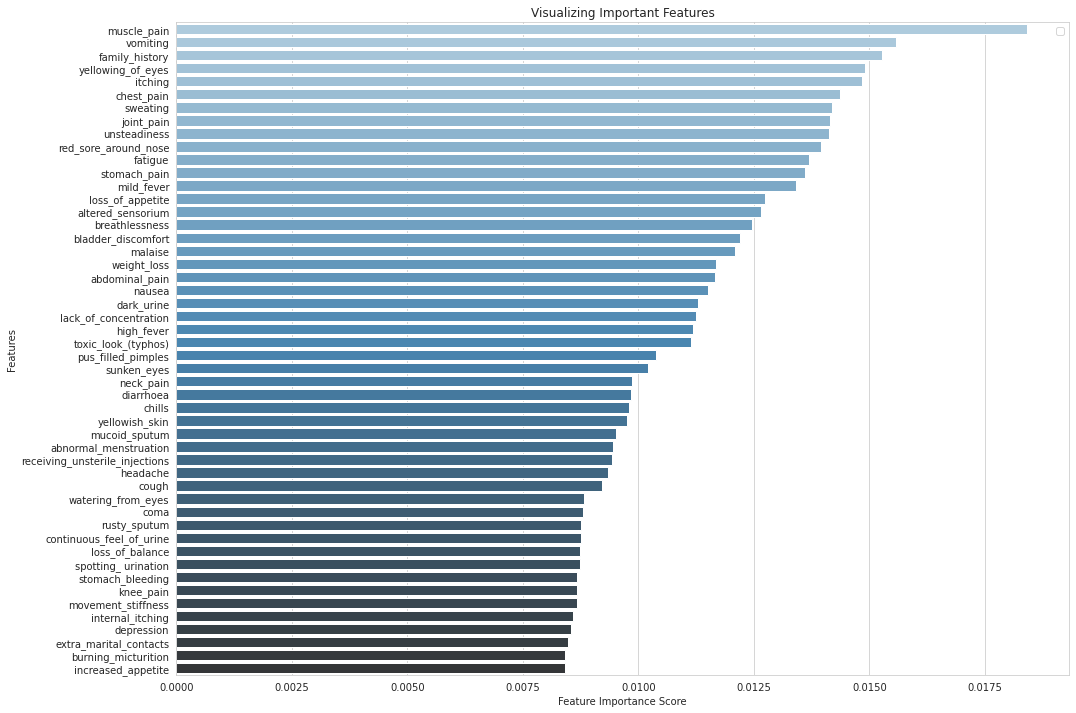

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.gcf()
fig.set_size_inches(16, 12)

# Creating a bar plot
sns.set_style("whitegrid")
sns.barplot(x=feature_imp, y=feature_imp.index, palette='Blues_d',color='white')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
X_reduced, y = data[['receiving_blood_transfusion', 'red_sore_around_nose',
       'abnormal_menstruation', 'continuous_sneezing', 'breathlessness',
       'blackheads', 'shivering', 'dizziness', 'back_pain', 'unsteadiness',
       'yellow_crust_ooze', 'muscle_weakness', 'loss_of_balance', 'chills',
       'ulcers_on_tongue', 'stomach_bleeding', 'lack_of_concentration', 'coma',
       'neck_pain', 'weakness_of_one_body_side', 'diarrhoea',
       'receiving_unsterile_injections', 'headache', 'family_history',
       'fast_heart_rate', 'pain_behind_the_eyes', 'sweating', 'mucoid_sputum',
       'spotting_ urination', 'sunken_eyes', 'dischromic _patches', 'nausea',
       'dehydration', 'loss_of_appetite', 'abdominal_pain', 'stomach_pain',
       'yellowish_skin', 'altered_sensorium', 'chest_pain', 'muscle_wasting',
       'vomiting', 'mild_fever', 'high_fever', 'red_spots_over_body',
       'dark_urine', 'itching', 'yellowing_of_eyes', 'fatigue', 'joint_pain',
       'muscle_pain']], data.iloc[:,-1]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3) # 70% training and 30% test

In [ ]:
X_reduced.head()


,receiving_blood_transfusion,red_sore_around_nose,abnormal_menstruation,continuous_sneezing,breathlessness,blackheads,shivering,dizziness,back_pain,unsteadiness,...,vomiting,mild_fever,high_fever,red_spots_over_body,dark_urine,itching,yellowing_of_eyes,fatigue,joint_pain,muscle_pain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9361987911349899


In [ ]:
feature_imp2 = pd.Series(clf2.feature_importances_,index=list(X_reduced.columns)).sort_values(ascending=False)
feature_imp2[::-1]

weakness_of_one_body_side         0.007247
ulcers_on_tongue                  0.008438
dehydration                       0.009000
sunken_eyes                       0.009367
continuous_sneezing               0.010119
pain_behind_the_eyes              0.010137
lack_of_concentration             0.010140
coma                              0.010554
receiving_blood_transfusion       0.010691
yellow_crust_ooze                 0.010791
mucoid_sputum                     0.011681
stomach_bleeding                  0.012127
shivering                         0.012532
unsteadiness                      0.012640
receiving_unsterile_injections    0.013045
dizziness                         0.013747
red_spots_over_body               0.014560
spotting_ urination               0.014697
back_pain                         0.014856
red_sore_around_nose              0.015231
dischromic _patches               0.015691
altered_sensorium                 0.016265
fast_heart_rate                   0.016474
stomach_pai

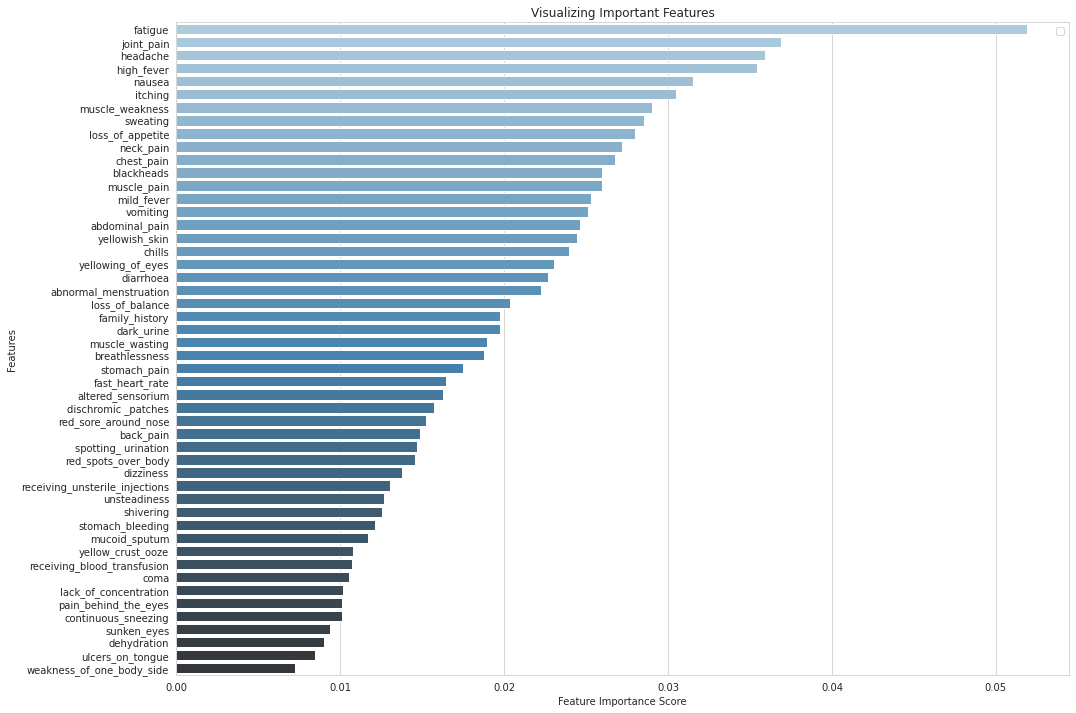

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 12)

# Creating a bar plot
sns.set_style("whitegrid")
sns.barplot(x=feature_imp2, y=feature_imp2.index, palette='Blues_d',color='white')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
#looking how much percent each diseases having
data['prognosis'].value_counts(normalize = True)

Arthritis                                  0.02439
Typhoid                                    0.02439
Malaria                                    0.02439
Dengue                                     0.02439
Hypoglycemia                               0.02439
Osteoarthristis                            0.02439
Dimorphic hemmorhoids(piles)               0.02439
Chronic cholestasis                        0.02439
Hepatitis B                                0.02439
Alcoholic hepatitis                        0.02439
Hepatitis C                                0.02439
Migraine                                   0.02439
GERD                                       0.02439
Gastroenteritis                            0.02439
Common Cold                                0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Drug Reaction                              0.02439
Fungal infection                           0.02439
Bronchial Asthma                           0.02439
Chicken pox                    

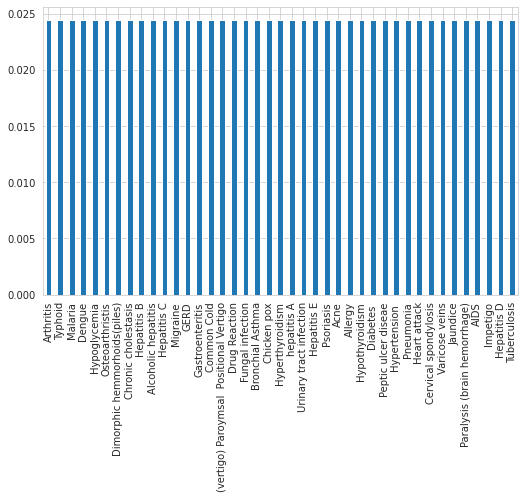

In [ ]:
#Plotting through bar chart 
data['prognosis'].value_counts(normalize = True).plot.bar()
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)